# CS 109A/AC 209A/STAT 121A Data Science: Homework 4
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 5th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
import statsmodels.api as sm
import itertools
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Jiang, Xiong]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

In [20]:
data = np.loadtxt ('datasets/dataset_1.txt',delimiter = ',', skiprows = 1)
# Split Predictors and Response 
x = data [:,:-1]
y = data [:,:-1]
df = pd.DataFrame (data)

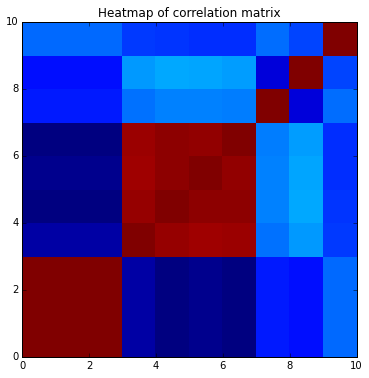

In [21]:
# Compute matrix of correlation coefficients

corr_matrix = np.corrcoef(x.T)

# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolormesh(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?

First three coefficient values display a strong correlation. They seem to have the same value. 

- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

Predictors such as [0,1,2],[4,5,6] display strong correlation. A stronger correlation can help identify the variables that will be the best used to evaluate the model. 

### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

In [79]:
def get_regression_results(predictor_subset, x, y):
    # Use only a subset of predictors in the training data
    x_subset = x[:, predictor_subset]

    # Fit and evaluate R^2
    model = sm.OLS(y, sm.add_constant(x_subset))
    
    return model.fit()

def get_best_k_subset(predictor_set, size_k, x, y):
    max_r_squared = -float('inf')  # set some initial small value for max R^2 score
    best_k_subset = None  # best subset of predictors of size k
    best_results = None

    for predictor_subset in itertools.combinations(predictor_set, size_k):
        results = get_regression_results(predictor_subset, x, y)
        r_squared = results.rsquared

        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset
        # we've found so far, remember the current predictor subset as the best!
        if r_squared > max_r_squared:
            max_r_squared = r_squared
            best_k_subset = predictor_subset
            best_results = results

    return best_k_subset, best_results


def get_results_stats(results):
    return 'bic: %.3f, R^2: %.3f' % (results.bic, results.rsquared)


def exhaustive_search_prob_1b(dataset_1_data):
    x = dataset_1_data.x
    y = dataset_1_data.y

    # Best Subset Selection
    min_bic = float('inf')  # set some initial large value for min BIC score
    best_subset = None  # best subset of predictors
    best_results = None

    num_predictors = x.shape[1]

    # Create all possible subsets of the set of <num_predictors> predictors
    predictor_set = xrange(num_predictors)  # e.g. predictor set = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    # Repeat for every possible size of subset
    for size_k in xrange(1, num_predictors + 1):
        k_subset, results = get_best_k_subset(predictor_set, size_k, x, y)

        bic = results.bic

        # Update minimum BIC and best predictor subset
        # If current predictor has a lower BIC score than that of the best subset
        # we've found so far, remember the current predictor as the best!
        if bic < min_bic:
            min_bic = bic
            best_subset = k_subset
            best_results = results

        print '%2d, %s, subset: %s' % (size_k, get_results_stats(results), str(k_subset))

    print 'Best subset by exhaustive search: %s, %s' % (str(best_subset), get_results_stats(best_results))

    
exhaustive_search_prob_1b(dataset_1_data)

 1, bic: -36.720, R^2: 0.369, subset: (8,)
 2, bic: -61.732, R^2: 0.531, subset: (8, 9)
 3, bic: -65.729, R^2: 0.570, subset: (5, 8, 9)
 4, bic: -71.008, R^2: 0.610, subset: (5, 7, 8, 9)
 5, bic: -72.366, R^2: 0.633, subset: (0, 5, 7, 8, 9)
 6, bic: -70.355, R^2: 0.642, subset: (0, 3, 5, 7, 8, 9)
 7, bic: -66.159, R^2: 0.644, subset: (0, 3, 5, 6, 7, 8, 9)
 8, bic: -61.803, R^2: 0.645, subset: (0, 3, 4, 5, 6, 7, 8, 9)
 9, bic: -61.803, R^2: 0.645, subset: (0, 1, 3, 4, 5, 6, 7, 8, 9)
10, bic: -61.803, R^2: 0.645, subset: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Best subset by exhaustive search: (0, 5, 7, 8, 9), bic: -72.366, R^2: 0.633


In [78]:
def find_best_predictor_to_add(current_predictors, remaining_predictors, x, y):
    max_r_squared = -float('inf')  # set some initial small value for max R^2
    best_predictor = None  # set some throwaway initial number for the best predictor to add
    best_results = None

    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        predictor_subset = current_predictors[:]
        # Add predictor 'i'
        predictor_subset.append(i)

        results = get_regression_results(predictor_subset, x, y)
        r_squared = results.rsquared

        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if r_squared > max_r_squared:
            max_r_squared = r_squared
            best_predictor = i
            best_results = results

    return best_predictor, best_results


def stepwise_forward_selection_prob_1b(dataset_1_data):
    x = dataset_1_data.x
    y = dataset_1_data.y

    # Step-wise Forward Selection
    d = x.shape[1]  # total no. of predictors

    # Keep track of current set of chosen predictors, and the remaining set of predictors
    current_predictors = []
    remaining_predictors = range(d)

    # Set some initial large value for min BIC score for all possible subsets
    min_bic = float('inf')
    results = None

    # Keep track of the best subset of predictors
    best_subset = None

    # Iterate over all possible subset sizes, 0 predictors to d predictors
    for size in xrange(d):
        predictor, results = find_best_predictor_to_add(current_predictors, remaining_predictors, x, y)

        # Remove best predictor from remaining list, and add best predictor to current list
        remaining_predictors.remove(predictor)
        current_predictors.append(predictor)

        print ' %d, %s, subset: %s' % (size, get_results_stats(results), current_predictors)

        # Check if BIC for with the predictor we just added is lower than
        # the global minimum across all subset of predictors
        if results.bic < min_bic:
            best_subset = current_predictors[:]
            min_bic = results.bic
            results = results

    print 'Best step-wise forward subset selection: %s, %s' % (sorted(best_subset), get_results_stats(results))

    
stepwise_forward_selection_prob_1b(dataset_1_data)

 0, bic: -36.720, R^2: 0.369, subset: [8]
 1, bic: -61.732, R^2: 0.531, subset: [8, 9]
 2, bic: -65.729, R^2: 0.570, subset: [8, 9, 5]
 3, bic: -71.008, R^2: 0.610, subset: [8, 9, 5, 7]
 4, bic: -72.366, R^2: 0.633, subset: [8, 9, 5, 7, 0]
 5, bic: -70.355, R^2: 0.642, subset: [8, 9, 5, 7, 0, 3]
 6, bic: -66.159, R^2: 0.644, subset: [8, 9, 5, 7, 0, 3, 6]
 7, bic: -61.803, R^2: 0.645, subset: [8, 9, 5, 7, 0, 3, 6, 4]
 8, bic: -61.803, R^2: 0.645, subset: [8, 9, 5, 7, 0, 3, 6, 4, 1]
 9, bic: -61.803, R^2: 0.645, subset: [8, 9, 5, 7, 0, 3, 6, 4, 1, 2]
Best step-wise forward subset selection: [0, 5, 7, 8, 9], bic: -61.803, R^2: 0.645


- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?


Exhaustive search generates similar results. The best subset is (0, 5, 7, 8, 9. Based on result from part one, [0],[4],[7,8,9] are the best predicators, with exhaustive search, the results (0, 5, 7, 8, 9) seem to be very close to what was concluded based on the heat map. The answers mostly match except for 4 or 5. 


### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

In [73]:
# Lasso Regression 
def regression_prob_1c(dataset_1_data, regression, regression_name):
    x = dataset_1_data.x
    y = dataset_1_data.y

    reg = regression(alpha=0.01)
    reg.fit(x, y)
    coefficients = reg.coef_
    
    print 'Lasso:'
    print 'Coefficients:', coefficients
    print  'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]
    
def lasso_regression_prob_1c(dataset_1_data):
    regression_prob_1c(dataset_1_data, Lasso_Reg, 'Lasso')

lasso_regression_prob_1c(dataset_1_data)

Lasso:
Coefficients: [ 0.02717417  0.          0.         -0.         -0.02532806 -0.         -0.
  0.04397321 -0.40612185 -0.22260474]
Predictors with non-zero coefficients: [0, 4, 7, 8, 9]


In [72]:
# Ridge Regression: Fit and Evaluate 
def ridge_regression_prob_1c(dataset_1_data):
    regression_prob_1c(dataset_1_data, Ridge_Reg, 'Ridge')
    
ridge_regression_prob_1c(dataset_1_data)

Lasso:
Coefficients: [ 0.04353543  0.04353543  0.04353543  0.55217415 -0.19706852 -0.61421737
  0.30484213  0.18742866 -0.50083242 -0.35908145]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


- Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

For the same lamba value, all the ridge regression model coefficients are non-zero. However, some lasso regression coefficients equal to zero. The ridge regression turns closer to zero while the parameter turn larger. Inversely, the lasso regression coefficients equal to zero to parameter turn larger

- Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?

They do not match with the ridge regression sets.

## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


In [59]:
Dataset_2_Data = namedtuple('Dataset_2_Data', ['train', 'test'])

XY_Data = namedtuple('XY_Data', ['x', 'y'])

def split(df, split_index):
    train = df[:split_index]
    test = df[split_index:]
    return train, test

def is_categorical(column):
    return column.dtype == object or len(column.unique()) < 8

def convert_categorical_columns(df):
    expanded_df = df.copy()
    for column_name in df.columns:
        column = df[column_name]
        if is_categorical(column):
            dummies_df = pd.get_dummies(column, prefix=column_name)

            expanded_df.drop(column_name, axis=1, inplace=True)
            expanded_df = expanded_df.join(dummies_df)

    return expanded_df


def encode_categorical_variables_prob_2a():
    df = pd.read_csv('datasets/dataset_2.txt')

    y = df['price']
    x_df = df.drop('price', axis=1)

    expanded_x_df = convert_categorical_columns(x_df)

    split_index = len(expanded_x_df) // 4

    x_train, x_test = split(expanded_x_df, split_index)
    y_train, y_test = split(y, split_index)

    train = XY_Data(x_train, y_train)
    test = XY_Data(x_test, y_test)

    return Dataset_2_Data(train, test)


def print_expanded_df_prob_2a(dataset_2_data):
    x = dataset_2_data.train.x

    print '%d predictors:' % len(x.columns)
    print x.columns

    
dataset_2_data = encode_categorical_variables_prob_2a()
print_expanded_df_prob_2a(dataset_2_data)

69 predictors:
Index([u'horsepower', u'highway-mpg', u'normalized-losses', u'wheel-base',
       u'length', u'width', u'height', u'curb-weight', u'engine-size', u'bore',
       u'stroke', u'compression-ratio', u'peak-rpm', u'city-mpg',
       u'symboling_-2.0', u'symboling_0.0', u'symboling_1.0',
       u'symboling_1.09604519774', u'symboling_2.0', u'symboling_3.0',
       u'make_audi', u'make_bmw', u'make_chevrolet', u'make_dodge',
       u'make_honda', u'make_mazda', u'make_mercedes-benz', u'make_mercury',
       u'make_mitsubishi', u'make_nissan', u'make_peugot', u'make_plymouth',
       u'make_porsche', u'make_renault', u'make_saab', u'make_subaru',
       u'make_toyota', u'make_volkswagen', u'make_volvo', u'fuel-type_diesel',
       u'fuel-type_gas', u'aspiration_std', u'aspiration_turbo',
       u'num-of-doors_four', u'num-of-doors_two', u'body-style_convertible',
       u'body-style_hardtop', u'body-style_hatchback', u'body-style_sedan',
       u'body-style_wagon', u'drive-wheel

### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

In [80]:
from sklearn.cross_validation import train_test_split

X = pd_auto_cate.drop('price', axis=1) 
y = pd_auto_cate['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)    

model = OLS(y_train, X_train)
results = model.fit()
r_squared = results.rsquared
print "Train Data R^2:" , r_squared

#Lin_Reg
regression = Lin_Reg()

#Regression model X, y
regression.fit(X_train,y_train)

#predict y-values
#predicted_y = regression.predict(X_test)
test_score = regression.score(X_test, y_test)
print "Test Data R^2:" , test_score

Train Data R^2: 0.999999912427
Test Data R^2: -971.483614744


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?

R^2 of the Train data is very high at 0.9973, however R^2 for the test data is negative therefore not a good fit.

- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.

The train data is a very good fit, whereas the test data is negative possibly due to high variance caused by low feature set.

- Is there a need for regularization while fitting a linear model to this data set?

No, there is not need for regularization for the ridge regression.

### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

In [60]:
from sklearn.cross_validation import train_test_split

X = pd_auto_cate.drop('price', axis=1) 
y = pd_auto_cate['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)    

model = OLS(y_train, X_train)
results = model.fit()
r_squared = results.rsquared
print "Train Data R^2:" , r_squared

#Lin_Reg
regression = Lin_Reg()

#Regression model X, y
regression.fit(X_train,y_train)

#predict y-values
#predicted_y = regression.predict(X_test)
test_score = regression.score(X_test, y_test)
print "Test Data R^2:" , test_score


Train Data R^2: 1.0
Test Data R^2: 0.400569097529


In [61]:
#regression = Lin_Reg()
#regression.fit(X_train, y_train)

train_r_squared_plain = regression.score(X_train, y_train)
test_r_squared_plain = regression.score(X_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain

Plain Regression: R^2 score on training set 1.0
Plain Regression: R^2 score on test set 0.400569097529


In [65]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 1.0)
reg.fit(X_train, y_train)
coefficients = reg.coef_

predictors = [i for i, item in enumerate(coefficients) if abs(item) > 0]

print 'Ridge Regression:'
print 'Normalized Coefficients:', coefficients.shape
print 'Selected predictors:',len(predictors)
print 'Ridge Regression: R^2 score on training set', reg.score(X_train,y_train)
print 'Ridge Regression: R^2 score on test set', reg.score(X_test,y_test)

Ridge Regression:
Normalized Coefficients: (68,)
Selected predictors: 64
Ridge Regression: R^2 score on training set 0.994196433711
Ridge Regression: R^2 score on test set 0.764123925459


train x shape: (51, 69), test x shape: (154, 69)
alpha: 1e-07, train R^2: 1.000, test R^2: -6.586
alpha: 1e-06, train R^2: 1.000, test R^2: -2.880
alpha: 1e-05, train R^2: 1.000, test R^2:  0.273
alpha: 1e-04, train R^2: 1.000, test R^2:  0.718
alpha: 1e-03, train R^2: 0.999, test R^2:  0.881
alpha: 1e-02, train R^2: 0.997, test R^2:  0.931
alpha: 1e-01, train R^2: 0.992, test R^2:  0.935
alpha: 1e+00, train R^2: 0.964, test R^2:  0.914
alpha: 1e+01, train R^2: 0.685, test R^2:  0.638
alpha: 1e+02, train R^2: 0.160, test R^2:  0.129
alpha: 1e+03, train R^2: 0.018, test R^2: -0.005
alpha: 1e+04, train R^2: 0.002, test R^2: -0.021
alpha: 1e+05, train R^2: 0.000, test R^2: -0.022
alpha: 1e+06, train R^2: 0.000, test R^2: -0.022
alpha: 1e+07, train R^2: 0.000, test R^2: -0.022


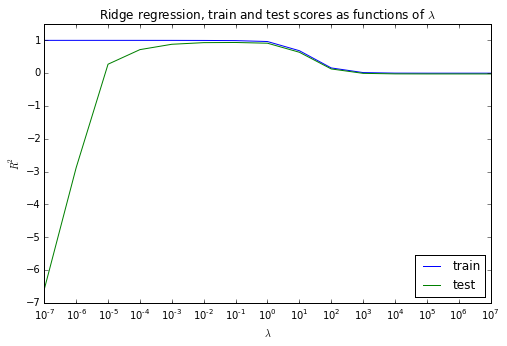

In [83]:
from itertools import izip


def get_ridge_regression_prob_2c_data(dataset_2_data):
    train = dataset_2_data.train
    test = dataset_2_data.test

    alpha_list = []
    train_score_list = []
    test_score_list = []

    for exponent in xrange(-7, 8):
        alpha = 10.0 ** exponent

        ridge_regression = Ridge_Reg(alpha=alpha, normalize=True)
        ridge_regression.fit(*train)
        train_score, test_score = score(ridge_regression, train, test)

        train_score_list.append(train_score)
        test_score_list.append(test_score)
        alpha_list.append(alpha)

    return alpha_list, train_score_list, test_score_list


def ridge_regression_prob_2c(dataset_2_data):
    train = dataset_2_data.train
    test = dataset_2_data.test

    print 'train x shape: %s, test x shape: %s' % (train.x.shape, test.x.shape)

    alpha_list, train_score_list, test_score_list = get_ridge_regression_prob_2c_data(dataset_2_data)

    for alpha, train_score, test_score in izip(alpha_list, train_score_list, test_score_list):
        print 'alpha: %.0e, train R^2: %.3f, test R^2: % .3f' % (alpha, train_score, test_score)

    _, ax = plt.subplots(1, 1, figsize=(8, 5))

    ax.plot(alpha_list, train_score_list, label='train')
    ax.plot(alpha_list, test_score_list, label='test')

    ax.set_xscale('log')
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('$R^2$')
    ax.set_ylim([-7.0, 1.5])
    ax.set_title('Ridge regression, train and test scores as functions of $\lambda$')

    ax.legend(loc='lower right')

    plt.show()

    
ridge_regression_prob_2c(dataset_2_data)

- Explain the relationship between the regularization parameter and the training and test R^2 scores.

When lamba equals to 0, the linear regresssion has a R^2 score of 1 for train data and R^2 = -6.586 for test data. It makes sence because when lamba value goes up, coefficients shrink in the ridge regression model. It causes lower variance and higher bias. 

- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

Ridge regression is a better test R^2 value (0.935 vs -5.975) because there are 51 observations and 69 predictors that cause high variance for the plain linear regression. 

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

alpha: 1e-07, cv score: -10.270
alpha: 1e-06, cv score:  -7.232
alpha: 1e-05, cv score:  -0.599
alpha: 1e-04, cv score:   0.355
alpha: 1e-03, cv score:   0.416
alpha: 1e-02, cv score:   0.597
alpha: 1e-01, cv score:   0.697
alpha: 1e+00, cv score:   0.683
alpha: 1e+01, cv score:   0.495
alpha: 1e+02, cv score:  -0.052
alpha: 1e+03, cv score:  -0.228
alpha: 1e+04, cv score:  -0.249
alpha: 1e+05, cv score:  -0.251
alpha: 1e+06, cv score:  -0.251
alpha: 1e+07, cv score:  -0.251


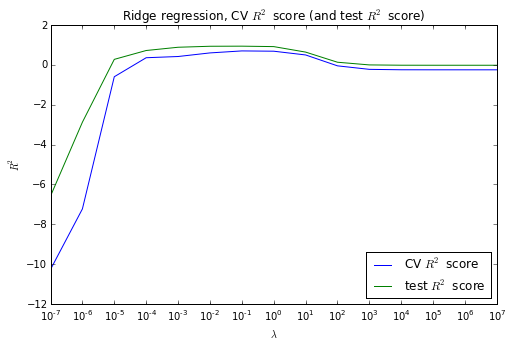

In [67]:
from sklearn.cross_validation import KFold

def score(regression, train, test):
    train_score = regression.score(*train)
    test_score = regression.score(*test)
    return train_score, test_score

def get_ridge_regression_scores(kf, ridge_regression, x_fold, y_fold):
    for train_index, test_index in kf:
        x_fold_train = x_fold.iloc[train_index]
        x_fold_test = x_fold.iloc[test_index]

        y_fold_train = y_fold[train_index]
        y_fold_test = y_fold[test_index]

        ridge_regression.fit(x_fold_train, y_fold_train)
        yield ridge_regression.score(x_fold_test, y_fold_test)


def cross_validation_prob_2d(dataset_2_data):
    train = dataset_2_data.train

    x_fold = train.x
    y_fold = train.y
    num_folds = 5
    kf = KFold(len(x_fold), n_folds=num_folds, shuffle=True, random_state=1090)

    alpha_list = 10.0 ** np.arange(-7, 8)
    cv_score_list = []
    for alpha in alpha_list:
        ridge_regression = Ridge_Reg(alpha=alpha, normalize=True)

        test_score_sum = sum(get_ridge_regression_scores(kf, ridge_regression, x_fold, y_fold))

        cv_score = test_score_sum / num_folds

        cv_score_list.append(cv_score)

        print 'alpha: %.0e, cv score: % 7.3f' % (alpha, cv_score)

    _, _, test_score_list = get_ridge_regression_prob_2c_data(dataset_2_data)

    _, ax = plt.subplots(1, 1, figsize=(8, 5))

    ax.plot(alpha_list, cv_score_list, label='CV $R^2$ score')
    ax.plot(alpha_list, test_score_list, label='test $R^2$ score')

    ax.set_xscale('log')
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('$R^2$')
    ax.set_title('Ridge regression, CV $R^2$ score (and test $R^2$ score)')

    ax.legend(loc='lower right')

    plt.show()

    
cross_validation_prob_2d(dataset_2_data)

 - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
 
CV R^2 scores are lower than the test R^2 scores. However they appear very similar. 

     
- Does the model chosen by CV or bootstrapping perform better than plain linear regression?

Yes, the model chosen by CV has lamda value of 0.1 with R^2 equals to 0.697


## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

### Part (b): Debug our implementation of ridge regression
You're a grader for CS109A, the following is an implemention of Ridge regression (via the above approach) submitted by a student. The dataset is ``dataset_3.txt``. The regression model is fitted to a training set, and the R^2 scores of the fitted model on the training and test sets are plotted as a function of the regularization parameter. Grade this solution according to the following rubric (each category is equally weighted): 

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

In addition to providing an holistic grade (between 0 to 5), provide a corrected version of this code that is submission quality.

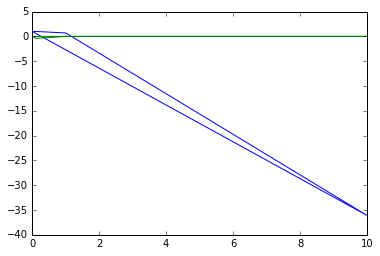

In [91]:
# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[0]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]
    import sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(m,x_test,y_test, reg_param):
    n=np.shape(x_train)[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+np.shape(x_test)[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.5))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i

# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
for j in range(0,5):    
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
plt.plot(a,rstr)
plt.plot(a,rsts)

alpha: 1e-02, train R^2: 0.998, test R^2: -4.960
alpha: 1e-01, train R^2: 0.996, test R^2: 0.304
alpha: 1e+00, train R^2: 0.991, test R^2: 0.799
alpha: 1e+01, train R^2: 0.959, test R^2: 0.852
alpha: 1e+02, train R^2: 0.824, test R^2: 0.723
alpha: 1e+03, train R^2: 0.635, test R^2: 0.612
alpha: 1e+04, train R^2: 0.564, test R^2: 0.599
alpha: 1e+05, train R^2: 0.578, test R^2: 0.577


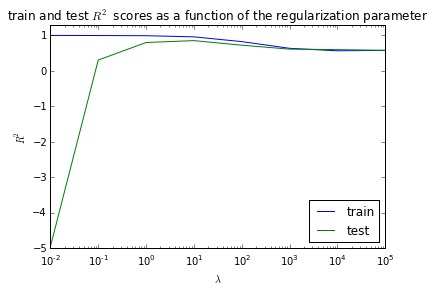

In [84]:
from sklearn.preprocessing import StandardScaler


RidgeRegressionModel = namedtuple('RidgeRegressionModel', ['linear_regression', 'x_scaler'])


# Fit

def get_aug_x_y(reg_param, x, y):
    n = len(x)
    num_predictors = x.shape[1]
    aug_x = np.vstack((x, np.sqrt(reg_param) * np.identity(n)))
    aug_y = np.vstack((y, np.zeros(num_predictors))).reshape(-1, 1)
    return aug_x, aug_y

def get_ridge_regression(x_train, y_train, reg_param):
    x_scaler = StandardScaler(with_mean=False)
    x_scaler.fit(x_train)
    scaled_x_train = x_scaler.transform(x_train)
    aug_x_train, aug_y_train = get_aug_x_y(reg_param, scaled_x_train, y_train)
    linear_regression = Lin_Reg()
    linear_regression.fit(aug_x_train, aug_y_train)
    return RidgeRegressionModel(linear_regression, x_scaler)

# Score

def score(model, x, y, reg_param):
    scaled_x = model.x_scaler.transform(x)
    aug_x, aug_y = get_aug_x_y(reg_param, scaled_x, y)
    return model.linear_regression.score(aug_x, aug_y)


def plot_train_test_scores(alphas, test_score_list, train_score_list, ylim, legend_loc):
    # Plot
    plt.plot(alphas, train_score_list, label='train')
    plt.plot(alphas, test_score_list, label='test')
    plt.xscale('log')
    plt.xlabel('$\lambda$')
    plt.ylabel('$R^2$')
    plt.title('train and test $R^2$ scores as a function of the regularization parameter')
    plt.ylim(ylim)
    plt.legend(loc=legend_loc)
    plt.show()

def ridge_regression_prob_3b():
    # Load
    data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
    n = len(data)
    split_index = n // 2
    x = data[:, :-1]
    y = data[:, -1]

    x_train, x_test = split(x, split_index)
    y_train, y_test = split(y, split_index)

    # Params
    alphas = 10.0 ** np.arange(-2, 6)

    train_score_list = []
    test_score_list = []

    for alpha in alphas:
        model = get_ridge_regression(x_train, y_train, alpha)
        train_score = score(model, x_train, y_train, alpha)
        test_score = score(model, x_test, y_test, alpha)

        train_score_list.append(train_score)
        test_score_list.append(test_score)

        print 'alpha: %.0e, train R^2: %.3f, test R^2: %.3f' % (alpha, train_score, test_score)

    plot_train_test_scores(alphas, test_score_list, train_score_list, [-5.0, 1.3], 'lower right')

ridge_regression_prob_3b()

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

Correctness: 1.5 Because the answer is wrong. interpretation 2: the code interpreted the problem and had the correct approach. code/algorithm design 1.5 code did work but there are  several mistakes and inefficiencies. presentation 1.5 Chart did not have titles or labels or convayed information Total Grade out of 1.6/5


## Challenge Problem: Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_4.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

**Note**: For additional information about the attributes used, please look up the file `dataset_4_description.txt`. This files also contains details of attributes that have been omitted from the data set.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 